In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://query.data.world/s/gl4ldmqj3t5h25s5f6lhgsj6kfkfr6?dws=00000", parse_dates={"date":["YEAR", "MONTH"]})
df["date"] = df["date"].dt.to_period("M")   # On a pas d'informations sur le jour et l'heure, seulement sur l'année et le mois

In [3]:
df.head()

,date,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
0,2015-03,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AEX,"Alexandria, LA",LA,Louisiana,US,United States
1,2015-04,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States
2,2015-03,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,ATL,"Atlanta, GA",GA,Georgia,US,United States
3,2015-01,89,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,Colombia
4,2015-03,108,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,BOG,"Bogota, Colombia",NaN,NaN,CO,Colombia


In [104]:
df[df["DEST_COUNTRY"]=="GA"]

,date,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
2629643,2001-11,0,20100.0,Polar Air Cargo Airways,JFK,"New York, NY",NY,New York,US,United States,LBV,"Libreville, Gabon",NaN,NaN,GA,Gabon
2884093,2017-06,0,20110.0,Antonov Company,SBD,"San Bernardino, CA",CA,California,US,United States,LBV,"Libreville, Gabon",NaN,NaN,GA,Gabon
3017534,2009-03,0,20190.0,Southern Air Inc.,ATL,"Atlanta, GA",GA,Georgia,US,United States,LBV,"Libreville, Gabon",NaN,NaN,GA,Gabon
3586633,2005-10,0,20308.0,Centurion Cargo Inc.,MIA,"Miami, FL",FL,Florida,US,United States,LBV,"Libreville, Gabon",NaN,NaN,GA,Gabon
5585680,2008-08,0,20428.0,Volga-Dnepr Airlines,IAH,"Houston, TX",TX,Texas,US,United States,LBV,"Libreville, Gabon",NaN,NaN,GA,Gabon
5585681,2012-11,0,20428.0,Volga-Dnepr Airlines,IAH,"Houston, TX",TX,Texas,US,United States,LBV,"Libreville, Gabon",NaN,NaN,GA,Gabon
5585972,2005-10,0,20428.0,Volga-Dnepr Airlines,LAX,"Los Angeles, CA",CA,California,US,United States,LBV,"Libreville, Gabon",NaN,NaN,GA,Gabon


<AxesSubplot:title={'center':'Nombre de passagers mensuel ayant pour destination FR'}, xlabel='Date (mois et année)', ylabel='Nombre de passagers'>

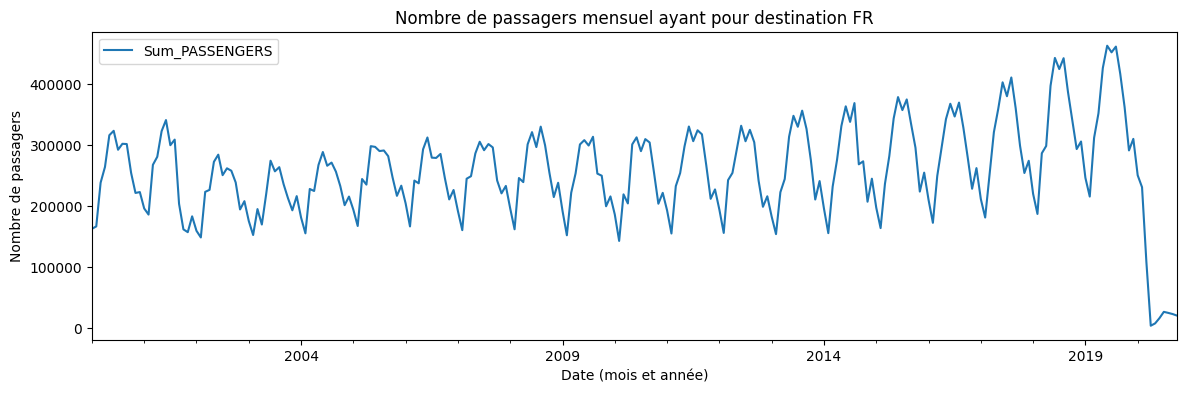

In [105]:
# Nombre de passagers allant dans un pays chaque mois
country_code = "FR"
data = df[df["DEST_COUNTRY"]==country_code][["date", "Sum_PASSENGERS"]].groupby("date").sum()
data.plot(title=f"Nombre de passagers mensuel ayant pour destination {country_code}",
          xlabel="Date (mois et année)",
          ylabel="Nombre de passagers",
          figsize=(14,4))

In [81]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
import numpy as np

In [75]:
nb_passengers = data["Sum_PASSENGERS"].values

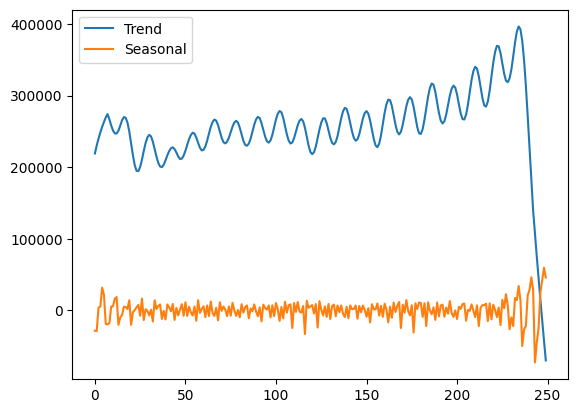

In [79]:
stl = STL(nb_passengers, period=7)
result = stl.fit()
plt.plot(result.trend, label="Trend")
plt.plot(result.seasonal, label="Seasonal")
plt.legend()

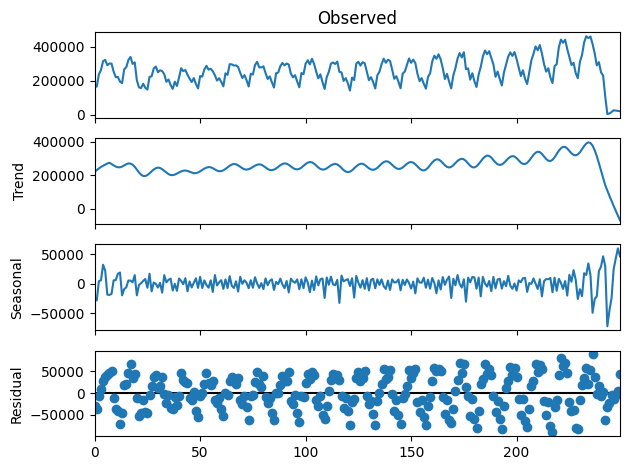

In [80]:
result.plot()
plt.show()

In [82]:
fh = np.arange(1,len(nb_passengers)+1) 

In [92]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as smape_loss
from sktime.utils.plotting import plot_series


forecaster = NaiveForecaster(strategy='last')
forecaster.fit(nb_passengers)
y_pred = forecaster.predict(fh)

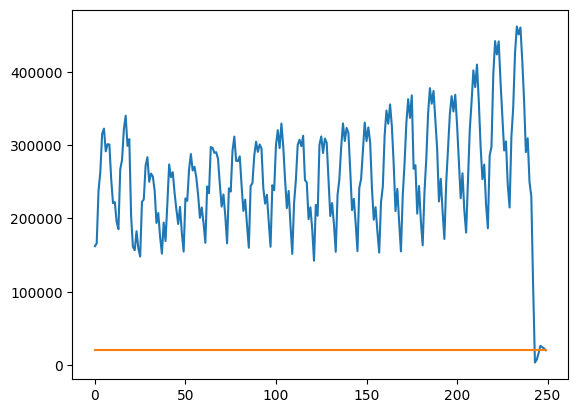

In [86]:
plt.plot(nb_passengers)
plt.plot(y_pred)

In [93]:
def plot_ys(*args, **kwargs):
        # restore 2020 behaviour (jfb) --> plot_ys supprimé
        nb_series=len(args)
        plot_series(*args, **kwargs, markers=['' for k in range(nb_series)])

In [95]:
plot_ys(data, y_pred)

TypeError: input must be a one of (<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.series.Series'>), but found type: <class 'numpy.ndarray'>